# **Factor relationships and distributions**

- We previously looked at relationships between numerical variables. 
- Of course, categorical variables, or factors, also have relationships.

# **Level of education: male partner**

- We haven't explored the categorical variables related to education level yet. 
- Let's fix that! 
- Checking the value_counts for education_man, we see that most men have an education level between primary and professional, with a few men in the "None" or "Other" categories.

In [ ]:
divorce["education_man"].value_counts()

In [ ]:
Professional    1313
Preparatory      501
Secondary        288
Primary          100
None               4
Other              3
Name: education_man, dtype: int64

# **Exploring categorical relationships**

- Categorical variables are harder to summarize numerically, so we often rely on visualizations to explore their relationships. 
- Perhaps we are interested in the relationship between marriage duration and the education level of the man in the dissolved marriage. 
- We could begin by making a histogram of the distribution of marriage duration

In [ ]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram using seaborn
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)

# Display the plot
plt.show()

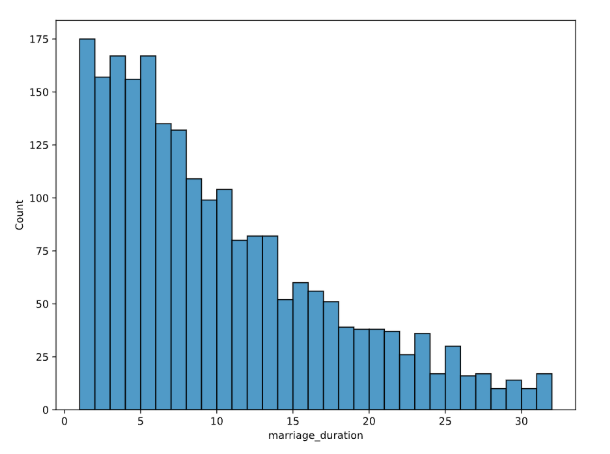

- layer in the information we have on male education level by setting education_man as the hue argument. 
- The resulting histogram reinforces what we saw in value_counts: we have a lot of information on males with professional-level education. 
- However, because the education levels are stacked on top of each other, the relationship between marriage duration and male education level isn't super clear.

In [ ]:
# Create a histogram using seaborn
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)

# Display the plot
plt.show()

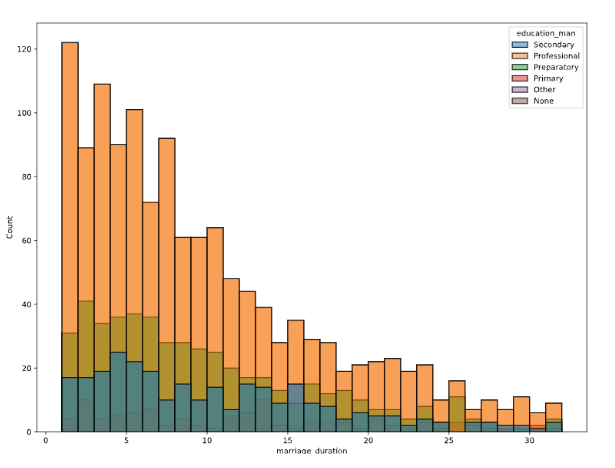

# **Kernel Density Estimate (KDE) plots**

- Seaborn's Kernel Density Estimate or KDE plots address this issue. 
- Similar to histograms, KDEs allow us to visualize distributions. 
- KDEs are considered more interpretable, though, especially when multiple distributions are shown as they are here. 
- Notice that the location of the peak marriage duration for each level of the male partner's education is more identifiable in this KDE plot than it was in the histogram. 
- However, due to the smoothing algorithm used in KDE plots, the curve can include values that don't make sense, so it's important to set good smoothing parameters.

In [ ]:
# Create the kdeplot
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")

# Show the plot
plt.show()

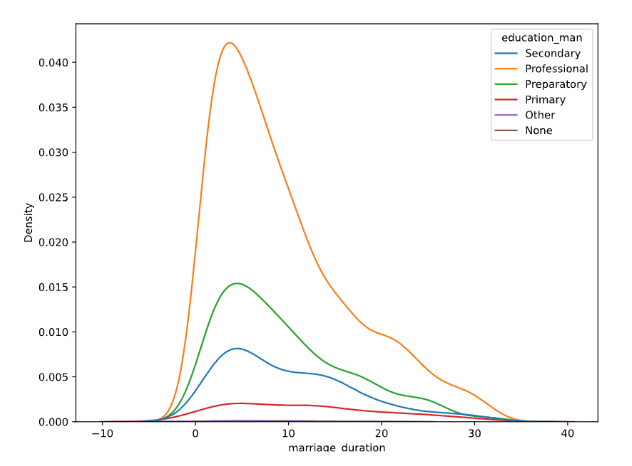

- Here's an example: zooming in on the KDE plot showing the distribution of male education levels, we can see that the distribution seems to suggest that some couples had marriage durations of less than zero. That's impossible!

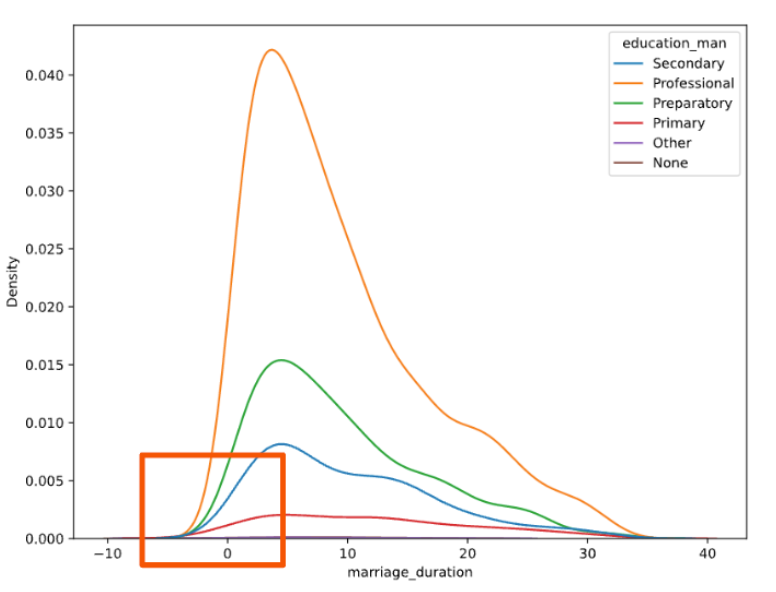

- To fix this, we can use the cut keyword argument. 
- cut tells Seaborn how far past the minimum and maximum data values the curve should go when smoothing is applied. 
- When we set cut equal to zero, the curve will be limited to values between the minimum and maximum x values, here, the minimum and maximum values for marriage duration. 
- The plot now shows only marriage durations greater than or equal to one year, the shortest marriage duration in the dataset.

In [ ]:
# Assuming 'divorce' is a pandas DataFrame with columns 'marriage_duration' and 'education_man'
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()

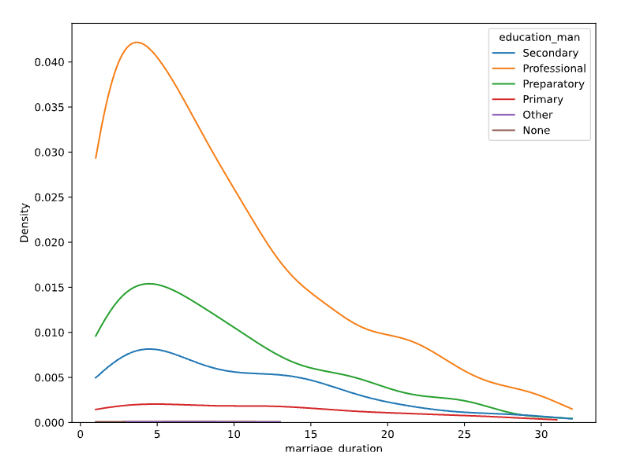

# **Cumulative KDE plots**

- If we're interested in the cumulative distribution function, we can set the cumulative keyword argument to True. 
- This graph describes the probability that marriage duration is less than or equal to the value on the x-axis for each level of male partner education.

In [ ]:
# Create the kdeplot
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)

# Show the plot
plt.show()

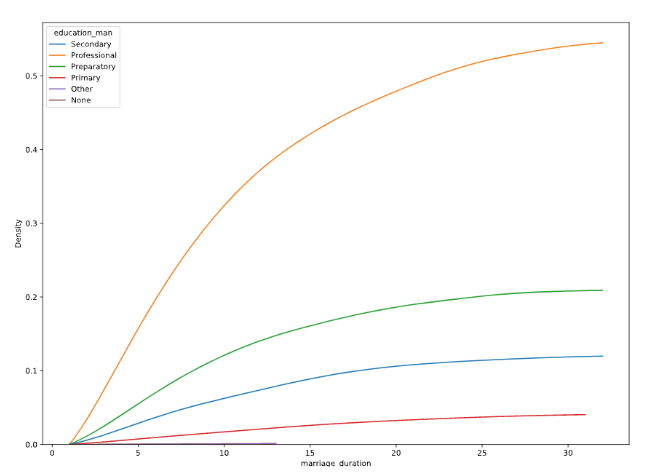

**Relationship between marriage age and education**

- Perhaps we are interested in whether divorced couples who got married when they were older typically have higher levels of education. 
- We can create columns representing the approximate age at marriage for men and women by subtracting each partner's birth year from the marriage year.

In [ ]:
# Calculate the man's age at marriage
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year

# Calculate the woman's age at marriage
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year


- Is there a relationship between age at marriage and education level?

# **Scatter plot with categorical variables**

- Then, we create a scatterplot using these variables on the x and y-axis. 
- It looks like there is a positive correlation between them! Indeed, the Pearson correlation coefficient is 0.69. 
- But the x and y values in scatter plots must be numerical. 
- How do we introduce education level into our visual?

In [ ]:
# Create a scatter plot using seaborn
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage")

# Display the plot
plt.show()

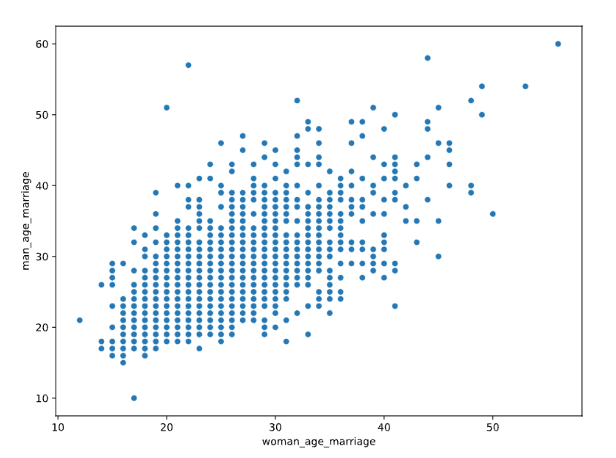

- One way to do this is to set the hue argument, which assigns a color to each data point based on values in a given column. 
- Here, we set hue equal to education_man. 
- The results suggest that men with a professional education level, represented with orange dots, may tend to get married later.

In [ ]:
sns.scatterplot(data=divorce,  # Replace 'divorce' with your dataframe
                x="woman_age_marriage",
                y="man_age_marriage",
                hue="education_man")

plt.show()

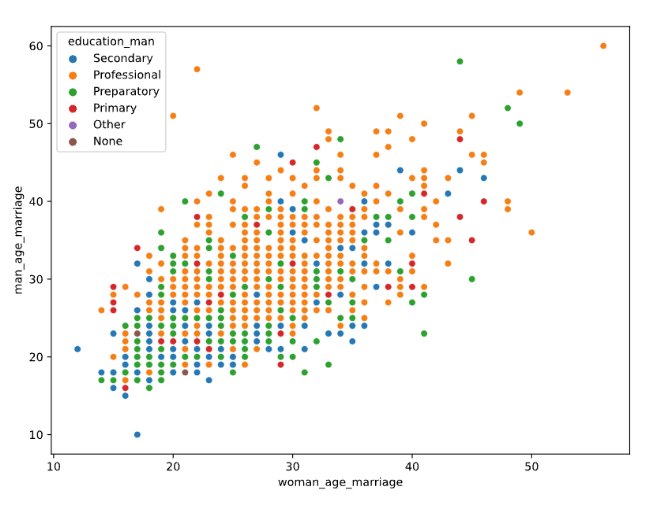